**Demonstration of RoboPy Pose.plot() and SerialLink.plot() rendering capability using MPL (Matplotlib).**

In [1]:
import os  # for checking values of environment variables.

""" Matplotlib imports
"""
import matplotlib
matplotlib.use('Qt4Agg')
%matplotlib notebook

from matplotlib import rc       # needed to set Matplotlib animation._repr_html_()
rc('animation', html='jshtml')  # Matplotlib animations will be HTML wrapped JavaScript

import numpy as np

""" RoboPy imports
"""
import _robopy
from robopy.base.graphics import GraphicsRenderer, trplot
import robopy.base.transforms as tr
import robopy.base.pose as pose
import robopy.base.model as model

Using RoboPy module /home/garyd/PycharmProjects/robopy/work/notebooks/poseMPL/../../../robopy.


<IPython.core.display.Javascript object>


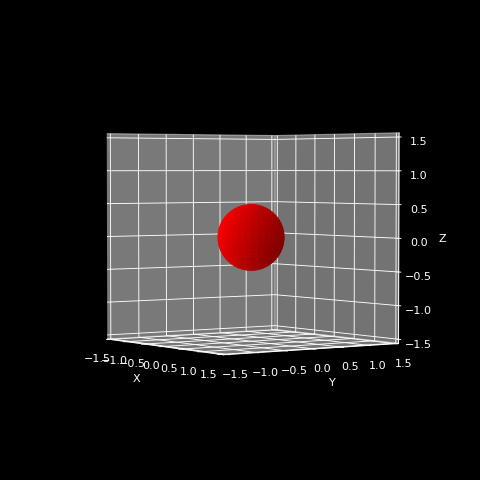

In [2]:
# Select a Graphics Rendering package to use.
gobj = GraphicsRenderer('MPL')  # this sets graphics.gRenderer
    
# Display a red sphere to show default figure properties.
gobj.draw_sphere()
gobj.show()

In [3]:
# Define some GraphicsMPL parameters which will be used in plot()
# method calls in following cells.

dMode = 'IPY'
limits = [-1.5, 1.5, -1.5, 1.5, -1.5, 1.5]

<IPython.core.display.Javascript object>


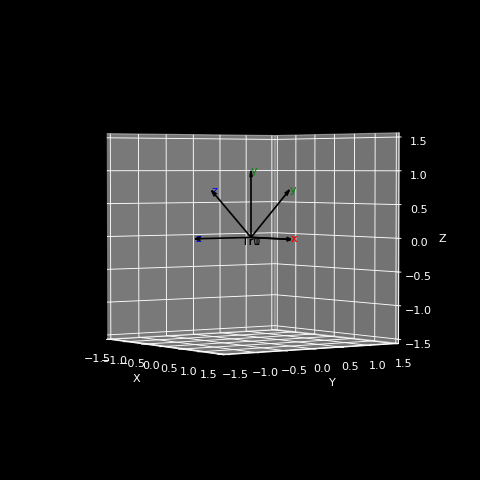

In [4]:
# Plot SE3 pose using MPL and display below.
gobj.close()  # close current figure 
pose.SE3.Rx(theta=[45, 90], unit='deg').plot(dispMode=dMode, fign=1, z_up=True, limits=limits)

<IPython.core.display.Javascript object>


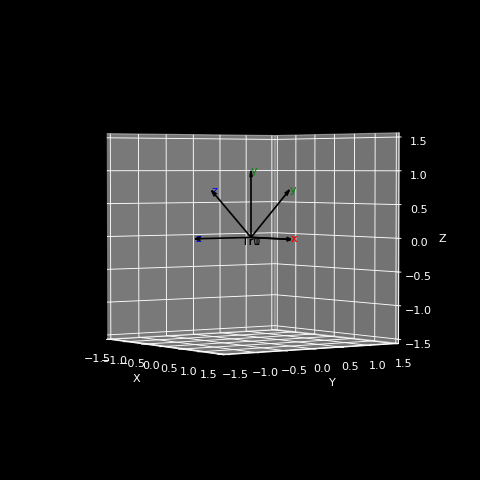

In [5]:
# Plot same SE2 transforms as previous cell, but use the trplot() function.
gobj.close()  # close current figure 
T = tr.rotx([45, 90], unit='deg')
trplot(T, fign=2)

<IPython.core.display.Javascript object>


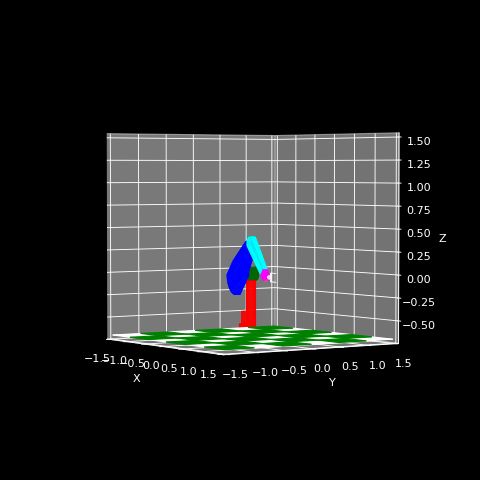

In [6]:
# Define a Puma506 robot model.
robot = model.Puma560()
    
# Puma560 manipulator arm pose plot using MPL and displayed below.
#
# Note: Matplotlib mpl_toolkit.mplot3d.Axes3D Poly3DCollection artists
#       do not properly perform hidden surface rendering with large
#       mesh facets.
gobj.close()  # close current figure 
robot.plot(robot.qn, dispMode=dMode, fign=3, z_up=False, limits=None)

<IPython.core.display.Javascript object>


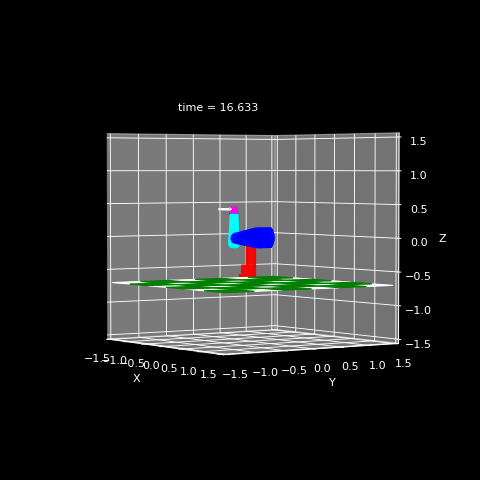

In [7]:
# Create range of stances
a = np.transpose(np.asmatrix(np.linspace(1, -180, 500)))
b = np.transpose(np.asmatrix(np.linspace(1, 180, 500)))
c = np.transpose(np.asmatrix(np.linspace(1, 90, 500)))
d = np.transpose(np.asmatrix(np.linspace(1, 450, 500)))
e = np.asmatrix(np.zeros((500, 1)))
f = np.concatenate((d, b, a, e, c, d), axis=1)

# Display animation of Puma560 manipulator arm motion.
#
# Note: Matplotlib is extremely slow at rendering of STL meshes.
gobj.close()  # close current figure 
robot.animate(stances=f, unit='deg', fign=4, timer_rate=60, frame_rate=30, dispMode=dMode)